<a href="https://colab.research.google.com/github/anidhyabhatnagar/sttp1/blob/classification-algorithms/Classification_Algorithms_in_Action_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classification

A Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.

Decision Tree consists of the following components:
*   **Nodes:** Test for the value of a certain attribute.
*   **Edges/ Branch:** Correspond to the outcome of a test and connect to the next node or leaf.
*   **Leaf Nodes:** Terminal nodes that predict the outcome (represent class labels or class distribution).


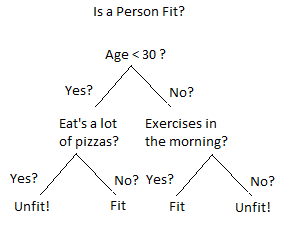

*Source: xoriant.com*

To use the decision algorithm: 

*   First, you start at the tree root and split the data on the feature that results in the largest information gain (IG) (reduction in uncertainty towards the final decision).

*   In an iterative process, you can then repeat this splitting procedure at each child node until the leaves are pure. *This means that the samples at each leaf node all belong to the same class.*

*   In practice, you should set a limit on the depth of the tree to prevent overfitting. *In this case, you will compromise on purity here somewhat as the final leaves may still have some impurity.*

Let's see Decision Tree Classification in Action

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the Dataset

In [3]:
url = "https://raw.githubusercontent.com/anidhyabhatnagar/machine_learning/master/datasets/social_media_ads.csv"
dataset = pd.read_csv(url)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting the Dataset into Training Set and Test Set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
print(y_train)

In [ ]:
print(y_test)

### Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

### Training the Decision Tree Classification Model on the Training Set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

### Predicting the Result

In [ ]:
print(classifier.predict(sc.transform([[30,87000]])))

### Predicting the Test Set Results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Creating the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

### Visualising the Training Set Results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test Set Results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()



---

